# NMR Spectra using Python

In [ ]:
import numpy as np

# Make Pauli matrices
sigmax = np.array([[0, 1./2], [1./2,0]])
sigmay = np.array([[0, (-1./2)*1j], [(1./2)*1j,0]])
sigmaz = np.array([[1./2, 0], [0,-1./2]])
unit = np.eye(2)
print("Shape of all these arrays are " + str(sigmax.shape) + ", " + str(sigmay.shape) 
+ ", " + str(sigmaz.shape) + ", " + str(unit.shape))

Shape of all these arrays are (2, 2), (2, 2), (2, 2), (2, 2)


In [ ]:
# Make 2-spin operators ## Ls correspond to first spin, Ss correspond to second spin
Lx = np.kron(sigmax, unit); Sx = np.kron(unit, sigmax) 
Ly = np.kron(sigmay, unit); Sy = np.kron(unit, sigmay)
Lz = np.kron(sigmaz, unit); Sz = np.kron(unit, sigmaz)
print("Spin operators are:")
print("Lx = ")
print(str(Lx))
print("Ly = ")
print(str(Ly))
print("Lz = ")
print(str(Lz))
print("Sx = ")
print(str(Sx))
print("Sy = ")
print(str(Sy))
print("Sz = ")
print(str(Sz))

Spin operators are:
Lx = 
[[0.  0.  0.5 0. ]
 [0.  0.  0.  0.5]
 [0.5 0.  0.  0. ]
 [0.  0.5 0.  0. ]]
Ly = 
[[0.+0.j  0.+0.j  0.-0.5j 0.-0.j ]
 [0.+0.j  0.+0.j  0.-0.j  0.-0.5j]
 [0.+0.5j 0.+0.j  0.+0.j  0.+0.j ]
 [0.+0.j  0.+0.5j 0.+0.j  0.+0.j ]]
Lz = 
[[ 0.5  0.   0.   0. ]
 [ 0.   0.5  0.   0. ]
 [ 0.   0.  -0.5 -0. ]
 [ 0.   0.  -0.  -0.5]]
Sx = 
[[0.  0.5 0.  0. ]
 [0.5 0.  0.  0. ]
 [0.  0.  0.  0.5]
 [0.  0.  0.5 0. ]]
Sy = 
[[0.+0.j  0.-0.5j 0.+0.j  0.-0.j ]
 [0.+0.5j 0.+0.j  0.+0.j  0.+0.j ]
 [0.+0.j  0.-0.j  0.+0.j  0.-0.5j]
 [0.+0.j  0.+0.j  0.+0.5j 0.+0.j ]]
Sz = 
[[ 0.5  0.   0.   0. ]
 [ 0.  -0.5  0.  -0. ]
 [ 0.   0.   0.5  0. ]
 [ 0.  -0.   0.  -0.5]]


In [ ]:
# Set Hamiltonian parameters
OmegaL = 2 * np.pi * 400 # Offset frequency of first spin in Hz
##OmegaS = 2 * np.pi * 700 # Offset frequency of second spin in Hz
OmegaS = 2 * np.pi * 400 # Offset frequency of second spin in Hz
##J = np.pi * 50 # J-coupling constant in Hz. Historically, the experimentally reported
              # J-coupling value is half the gap between full peaks and not the full gap
J = 0 # J-coupling constant

### Without dipole interactions (liquid NMR)

In [ ]:
# Write the Hamiltonian
H = OmegaL * Lz + OmegaS * Sz + J * ( np.matmul(Lx, Sx) + np.matmul(Ly, Sy) + np.matmul(Lz, Sz) )
print("Hamiltonian is ")
print(str(H))
print("Order of Hamiltonian is " + str(H.shape))

Hamiltonian is 
[[ 1295.90696961+0.j     0.        +0.j     0.        +0.j
      0.        +0.j]
 [    0.        +0.j   -39.26990817+0.j    78.53981634+0.j
      0.        +0.j]
 [    0.        +0.j    78.53981634+0.j   -39.26990817+0.j
      0.        +0.j]
 [    0.        +0.j     0.        +0.j     0.        +0.j
  -1217.36715327+0.j]]
Order of Hamiltonian is (4, 4)


In [ ]:
# Set initial state
rho0 = Lz + Sz
# Set detection state i.e. the state after rf pulse is just over
rhod = (Lx + Sx) + (Ly + Sy)*1j
print("Initial state is ")
print(rho0)
print("State after rf pulse is over is ")
print(rhod)

Initial state is 
[[ 1.  0.  0.  0.]
 [ 0.  0.  0.  0.]
 [ 0.  0.  0.  0.]
 [ 0.  0.  0. -1.]]
State after rf pulse is over is 
[[0.+0.j 1.+0.j 1.+0.j 0.+0.j]
 [0.+0.j 0.+0.j 0.+0.j 1.+0.j]
 [0.+0.j 0.+0.j 0.+0.j 1.+0.j]
 [0.+0.j 0.+0.j 0.+0.j 0.+0.j]]


In [ ]:
# Construct propagators
import scipy.linalg
pulse_prop = scipy.linalg.expm(-1j * (Ly + Sy) * np.pi/2) # Since it is a pi/2 pulse that causes rotation about y axis
time_step = 1. / np.linalg.norm(H, 'fro')
evolution_prop = scipy.linalg.expm(-1j * H * time_step)
print("Pulse propagator = ")
print(pulse_prop)
print("Evolution propagator = ")
print(evolution_prop)
print("time_step is " + str(time_step))

Pulse propagator = 
[[ 0.5+0.j -0.5+0.j -0.5+0.j  0.5+0.j]
 [ 0.5+0.j  0.5+0.j -0.5+0.j -0.5+0.j]
 [ 0.5+0.j -0.5+0.j  0.5+0.j -0.5+0.j]
 [ 0.5+0.j  0.5+0.j  0.5+0.j  0.5+0.j]]
Evolution propagator = 
[[7.47120562e-01-0.66468855j 0.00000000e+00+0.j
  0.00000000e+00+0.j         0.00000000e+00+0.j        ]
 [0.00000000e+00+0.j         9.98786810e-01+0.02200946j
  9.70481096e-04-0.04404031j 0.00000000e+00+0.j        ]
 [0.00000000e+00+0.j         9.70481096e-04-0.04404031j
  9.98786810e-01+0.02200946j 0.00000000e+00+0.j        ]
 [0.00000000e+00+0.j         0.00000000e+00+0.j
  0.00000000e+00+0.j         7.75675518e-01+0.63113191j]]
time_step is 0.0005610563785037028


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: ComplexWarning: Casting complex values to real discards the imaginary part
  if __name__ == '__main__':


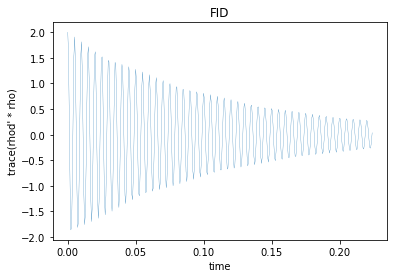

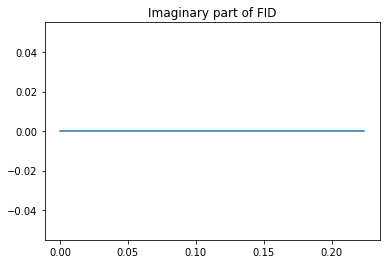

In [ ]:
# Now the pulse happens for a short time interval because of which wavefunction rho changes
rho = np.matmul( np.matmul(pulse_prop , rho0) , np.matrix.getH(pulse_prop) )

# Now free induction decay happens since the pulse is over
nsteps = 400

fid = np.zeros((nsteps,))
for n in range(nsteps):
  fid[n] = np.matrix.trace(np.matmul( np.matrix.getH(rhod) , rho )) # A measure oh how close our state is to detection state
  rho = np.matmul( np.matmul( evolution_prop , rho) , np.matrix.getH(evolution_prop)) # We are letting the spins
                                                                                  # relax after rf pulse is over
# In real life Apozidation happens because as time progresses, our state gets further 
# from detection state and is more stable. ## HOW DO WE DO APODIZATION? ##
# So we create a window function and multiply it to the fid
for n in range(nsteps):
  fid[n] *= np.exp(-2.*(n/nsteps))

# Now plot the fid

import matplotlib.pyplot as plt
plt.figure()
plt.plot(np.arange(nsteps) * time_step, fid, linewidth=0.25) # FID == Real part of FID
plt.title("FID")
plt.xlabel("time")
plt.ylabel("trace(rhod' * rho)")
plt.show()
plt.figure()
plt.plot(np.arange(nsteps) * time_step, fid.imag, label="Imaginary part of FID")
plt.title("Imaginary part of FID")
plt.show()

/usr/local/lib/python3.7/dist-packages/matplotlib/cbook/__init__.py:1317: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


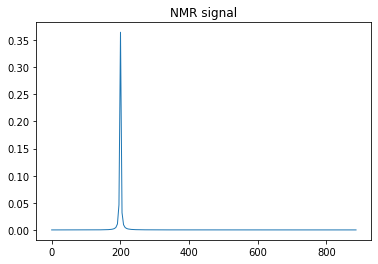

In [ ]:
from scipy.fft import fft, fftfreq
# Performing Fourier transform of the FID signal.
fid_FT = fft(fid, nsteps)[ : nsteps//2] # number of points in fid_FT = number of points in fid = nsteps
fid_freq = fftfreq(nsteps, time_step)[ : nsteps//2]
NMRsignal = ( fid_FT * np.conj(fid_FT) / nsteps )

plt.figure()
plt.plot(fid_freq, 2./nsteps * NMRsignal
          , linewidth=1) ### Have to figure out how to make x axis meaningful ###
plt.title("NMR signal")
#plt.show()
#plt.xlim(450, 550) # To zoom into the plot

plt.show()

##print("Array of NMRsignal has shape " + str(NMRsignal.shape))

### With dipole interactions, in anisotropic solids (so Hamiltonian depends on $\Theta$)

In [ ]:
# Write the Hamiltonian
import numpy as np
def Hamiltonian(angle, OmegaL, OmegaS, J, b12): # angle is assumed to be in radians by default. We will substitute 'theta' for 'angle'//
  return (OmegaL * Lz + OmegaS * Sz + J * ( np.matmul(Lx, Sx) + np.matmul(Ly, Sy) + np.matmul(Lz, Sz) ) 
    + b12*( 3*np.matmul(Lz, Sz) -  np.matmul(Lx, Sx) -  np.matmul(Ly, Sy) -  np.matmul(Lz, Sz) )*(3*(np.cos(angle))**2 - 1)/2. )

In [ ]:
# Set initial state
rho0 = Lz + Sz
# Set final state
rhof = (Lx + Sx) + (Ly + Sy)*1j
print("Initial state is ")
print(rho0)
print("State wanted finally is ")
print(rhof)

Initial state is 
[[ 1.  0.  0.  0.]
 [ 0.  0.  0.  0.]
 [ 0.  0.  0.  0.]
 [ 0.  0.  0. -1.]]
State wanted finally is 
[[0.+0.j 1.+0.j 1.+0.j 0.+0.j]
 [0.+0.j 0.+0.j 0.+0.j 1.+0.j]
 [0.+0.j 0.+0.j 0.+0.j 1.+0.j]
 [0.+0.j 0.+0.j 0.+0.j 0.+0.j]]


In [ ]:
import ipywidgets as wig
from IPython.display import display
import scipy.linalg
import matplotlib.pyplot as plt
from scipy.fft import fft, fftfreq, fftshift

def update(theta, b12_): # Additional Hamiltonian parameter b12_
  H = Hamiltonian(angle=theta, OmegaL=OmegaL, OmegaS=OmegaS, J=J, b12=b12_)

  # Construct propagators
  pulse_prop = scipy.linalg.expm(-1j * (Ly + Sy) * np.pi/2) # Since it is a pi/2 pulse that causes rotation about y axis
  time_step = 1. / np.linalg.norm(H, 'fro')
  evolution_prop = scipy.linalg.expm(-1j * H * time_step)

  # Now the pulse happens for a short time interval because of which wavefunction rho changes
  rho = np.matmul( np.matmul(pulse_prop , rho0) , np.matrix.getH(pulse_prop) )

  # Now free induction decay happens since the pulse is over
  nsteps = 400
  fid = np.zeros((nsteps,))
  for n in range(nsteps):
    fid[n] = np.matrix.trace(np.matmul( np.matrix.getH(rhof) , rho ))
    rho = np.matmul( np.matmul( evolution_prop , rho) , np.matrix.getH(evolution_prop))

  # In real life Apozidation happens instead of the pulse stopping abruptly.
  # So we create a window function and multiply it to the fid
  for n in range(nsteps):
    fid[n] *= np.exp(-2.*(n/nsteps))

  # Now plot the fid (uncomment the double hashed lines below to do this)
  ##import matplotlib.pyplot as plt
  ##plt.figure()
  ##plt.plot(np.arange(nsteps), fid, linewidth=0.5) # FID == Real part of FID
  ##plt.title("FID")
  ##plt.show()
  ##plt.figure()
  ##plt.plot(np.arange(nsteps), fid.imag, label="Imaginary part of FID")
  ##plt.title("Imaginary part of FID")
  ##plt.show()

  # Performing Fourier transform of the FID signal.
  fid_FT = fft(fid, nsteps)[ : nsteps//2] # number of points in fid_FT = number of points in fid = nsteps
  fid_freq = fftfreq(nsteps, time_step)[ : nsteps//2]
  NMRsignal = ( fid_FT * np.conj(fid_FT) / nsteps )
  plt.figure()
  plt.plot(fid_freq, 2./nsteps * NMRsignal
            , linewidth=1) ### Have to figure out how to make x axis meaningful ###
  plt.title("NMR signal")
  #plt.xlim(100, 300) # To zoom into the plot
  plt.show()
  #print("Array of NMRsignal has shape " + str(NMRsignal.shape))

thetaa = wig.FloatSlider(description = "Theta", value = 1.66, min = 0, max = np.pi, step = 0.1)
b12__ = wig.FloatSlider(description="b12", value = 1000., min = 0., max = 20000., step=100)
wig.interact(update, theta=thetaa, b12_=b12__)
plt.show()

interactive(children=(FloatSlider(value=1.66, description='Theta', max=3.141592653589793), FloatSlider(value=1…

### Sum of all NMR plots over $\Theta$ for powder

In [ ]:
# Write the Hamiltonian
import numpy as np
def Hamiltonian(angle, OmegaL, OmegaS, J, d12): # angle is assumed to be in radians by default. We will substitute 'theta' for 'angle'
                                                # d12 is in Hertz
  return (OmegaL * Lz + OmegaS * Sz + J * ( np.matmul(Lx, Sx) + np.matmul(Ly, Sy) + np.matmul(Lz, Sz) ) 
    + d12*( 3*np.matmul(Lz, Sz) -  np.matmul(Lx, Sx) -  np.matmul(Ly, Sy) -  np.matmul(Lz, Sz) )*(3*(np.cos(angle))**2 - 1)/2. )

In [ ]:
# Set initial state
rho0 = Lz + Sz
# Set detection state i.e. the state after rf pulse is just over
rhod = (Lx + Sx) + (Ly + Sy)*1j
print("Initial state is ")
print(rho0)
print("State after rf pulse is over is ")
print(rhod)

Initial state is 
[[ 1.  0.  0.  0.]
 [ 0.  0.  0.  0.]
 [ 0.  0.  0.  0.]
 [ 0.  0.  0. -1.]]
State after rf pulse is over is 
[[0.+0.j 1.+0.j 1.+0.j 0.+0.j]
 [0.+0.j 0.+0.j 0.+0.j 1.+0.j]
 [0.+0.j 0.+0.j 0.+0.j 1.+0.j]
 [0.+0.j 0.+0.j 0.+0.j 0.+0.j]]


In [ ]:
# one needs to set the value of d12 below

In [ ]:
import scipy.linalg
import matplotlib.pyplot as plt
from scipy.fft import fft, fftfreq, fftshift

dtheta = 0.005
NMRsignal = 0.0 # This variable will finally store the array of NMR signal

for theta in list(np.linspace(0, np.pi, int(np.pi/dtheta))):
  H = Hamiltonian(angle=theta, OmegaL=OmegaL, OmegaS=OmegaS, J=J, d12=300.00)
  
  # Construct propagators
  pulse_prop = scipy.linalg.expm(-1j * (Ly + Sy) * np.pi/2) # Since it is a pi/2 pulse that causes rotation about y axis
  time_step = 1. / np.linalg.norm(H, 'fro')
  evolution_prop = scipy.linalg.expm(-1j * H * time_step)

  # Now the pulse happens for a short time interval because of which wavefunction rho changes
  rho = np.matmul( np.matmul(pulse_prop , rho0) , np.matrix.getH(pulse_prop) )

  # Now free induction decay happens since the pulse is over
  nsteps = 4000
  fid = np.zeros((nsteps,))
  for n in range(nsteps):
    fid[n] = np.matrix.trace(np.matmul( np.matrix.getH(rhod) , rho )) # A measure of how close our state is to detection state
    rho = np.matmul( np.matmul( evolution_prop , rho) , np.matrix.getH(evolution_prop)) # We are letting the spins
                                                                                    # relax after rf pulse is over

  # In real life Apozidation happens because as time progresses, our state gets further 
  # from detection state and is more stable. ## HOW DO WE DO APODIZATION? ##
  # So we create a window function and multiply it to the fid
  for n in range(nsteps):
    fid[n] *= np.exp(-2.*(n/nsteps))

  # Performing Fourier transform of the FID signal.
  fid_FT = fft(fid, nsteps)[ : nsteps//2] # number of points in fid_FT = number of points in fid = nsteps
  fid_freq = fftfreq(nsteps, time_step)[ : nsteps//2]
  NMRsignal += ( fid_FT * np.conj(fid_FT) / nsteps ) * np.sin(theta) # we include the sin because theta is in spherical coords

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:23: ComplexWarning: Casting complex values to real discards the imaginary part


/usr/local/lib/python3.7/dist-packages/matplotlib/cbook/__init__.py:1317: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


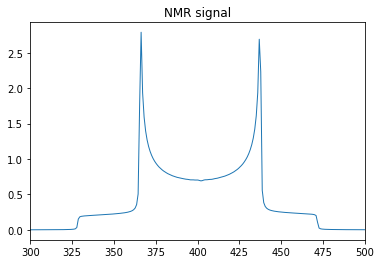

In [ ]:
plt.figure()
plt.plot(fid_freq, 2./nsteps * NMRsignal
          , linewidth=1)
#plt.scatter(fid_freq, 2./nsteps * NMRsignal, s=5)
plt.title("NMR signal")
plt.xlim(300, 500) # To zoom into the plot
plt.show()
#print("Array of NMRsignal has shape " + str(NMRsignal.shape))

In [ ]:
# ignore the below cell